In [23]:
import pandas as pd 
import numpy as np

stu_consume=pd.read_csv("학력별_임금.csv", encoding='cp949')
stu_consume.index=stu_consume.iloc[:,0]
stu_consume=stu_consume.iloc[:,1:]
stu_consume=stu_consume.transpose()
stu_consume
# 날짜 변환 함수
def convert_date(date_str):
    year=str(date_str)
    month = '01'
    return pd.to_datetime(f'{year}-{month}-01')

stu_consume.index=stu_consume.index.map(convert_date)
date_range = pd.date_range(start='2006-01-01', end='2023-01-01', freq='MS')

stu_monthly = pd.DataFrame(index=date_range, columns=stu_consume.columns)

for date, row in stu_consume.iterrows():
    stu_monthly.loc[date] = row

stu_monthly

학력,전체,중졸이하,고졸,전문대졸,대졸,대학원졸
2006-01-01,11172,7728,9009,9974,15438,23194
2006-02-01,NaN,NaN,NaN,NaN,NaN,NaN
2006-03-01,NaN,NaN,NaN,NaN,NaN,NaN
2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-09-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-01,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-01,NaN,NaN,NaN,NaN,NaN,NaN


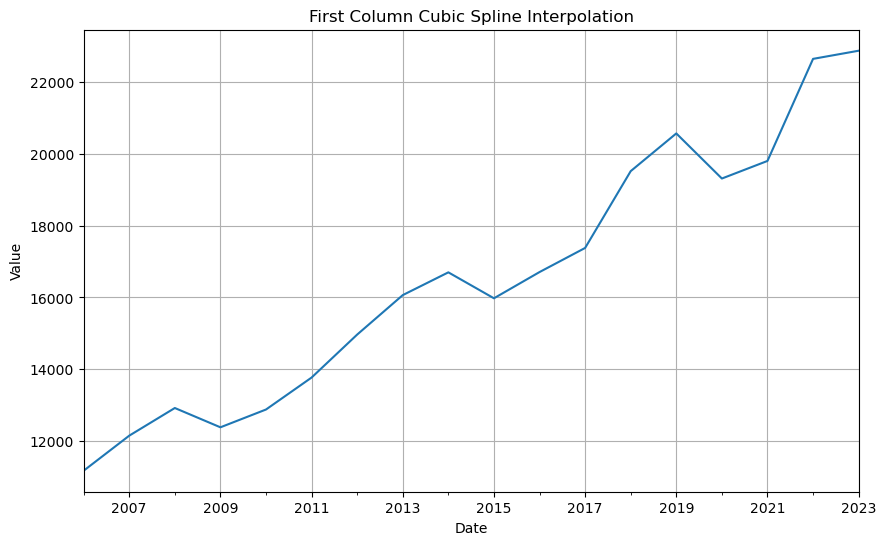

In [30]:
import matplotlib.pyplot as plt
# 큐빅 스플라인 보간법 적용 함수
def cubic_spline_interpolation(series):
    series = pd.to_numeric(series, errors='coerce')
    non_nan = series.dropna()
    if len(non_nan) < 4:
         return series.interpolate(method='polynomial', order=3)
    x = np.arange(len(series))
    y = series.values
    mask = ~np.isnan(y)
    if np.sum(mask) < 4:
         return series.interpolate(method='polynomial', order=3)
    try:
        f = interpolate.interp1d(x[mask], y[mask], kind='cubic', fill_value='extrapolate')
        return pd.Series(f(x), index=series.index)
    except:
         return series.interpolate(method='polynomial', order=3)

# 각 열에 대해 큐빅 스플라인 보간 적용
for column in stu_monthly.columns:
    stu_monthly[column] = cubic_spline_interpolation(stu_monthly[column])

stu_monthly.to_csv("산업별_학력_임금_최종.csv")

# Plot the first column
plt.figure(figsize=(10, 6))
stu_monthly.iloc[:, 0].plot(title='First Column Cubic Spline Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [19]:
import pandas as pd 
import numpy as np

develop=pd.read_csv("연구개발비.csv", index_col=0,encoding='cp949')
develop=develop.transpose()
def convert_date(date_str):
    year=str(date_str)
    month = '01'
    return pd.to_datetime(f'{year}-{month}-01')

develop.index=develop.index.map(convert_date)
date_range = pd.date_range(start='2003-01-01', end='2024-01-01', freq='MS')

develop_monthly = pd.DataFrame(index=date_range, columns=develop.columns)

for date, row in develop.iterrows():
    develop_monthly.loc[date] = row

develop_monthly

날짜,국내총생산대비(A/B) (%),기초연구,응용연구,개발연구
2003-01-01,2.28,0.329842,0.475162,1.474996
2003-02-01,NaN,NaN,NaN,NaN
2003-03-01,NaN,NaN,NaN,NaN
2003-04-01,NaN,NaN,NaN,NaN
2003-05-01,NaN,NaN,NaN,NaN
...,...,...,...,...
2023-09-01,NaN,NaN,NaN,NaN
2023-10-01,NaN,NaN,NaN,NaN
2023-11-01,NaN,NaN,NaN,NaN
2023-12-01,NaN,NaN,NaN,NaN


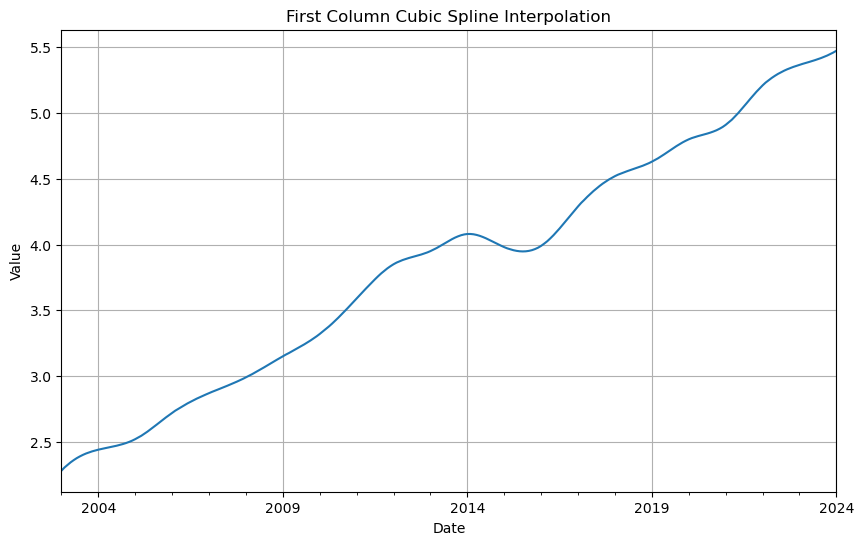

In [20]:
import matplotlib.pyplot as plt
# 큐빅 스플라인 보간법 적용 함수
def cubic_spline_interpolation(series):
    series = pd.to_numeric(series, errors='coerce')
    non_nan = series.dropna()
    if len(non_nan) < 4:
         return series.interpolate(method='polynomial', order=3)
    x = np.arange(len(series))
    y = series.values
    mask = ~np.isnan(y)
    if np.sum(mask) < 4:
         return series.interpolate(method='polynomial', order=3)
    try:
        f = interpolate.interp1d(x[mask], y[mask], kind='cubic', fill_value='extrapolate')
        return pd.Series(f(x), index=series.index)
    except:
         return series.interpolate(method='polynomial', order=3)

# 각 열에 대해 큐빅 스플라인 보간 적용
for column in develop_monthly.columns:
    develop_monthly[column] = cubic_spline_interpolation(develop_monthly[column])

develop_monthly.to_csv("연구개발비_진짜최종.csv")

# Plot the first column
plt.figure(figsize=(10, 6))
develop_monthly.iloc[:, 0].plot(title='First Column Cubic Spline Interpolation')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()